In [43]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np


data = pd.read_csv("MMM refined dataset.csv")
data = data.loc[data['Season'] == 2003]
data.head()

,Season,Team,AvgPointSpread,Wins,Losses,FieldGoalAvg,ThreePointAvg,FreeThrowAvg,ReboundAvg,AssistAvg,TurnOverAvg,StealAvg,BlockAvg,PersonalFoulAvg
0,2003,1328,11.00000,24,6,0.446934,0.393673,0.707885,37.10000,14.16667,11.80000,6.933333,3.766667,18.60000
1,2003,1448,10.79310,24,5,0.456627,0.344358,0.752591,41.68966,14.58621,15.10345,6.413793,4.379310,18.48276
2,2003,1393,10.20690,24,5,0.470067,0.330435,0.693431,41.20690,14.96552,13.62069,8.310345,7.275862,16.58621
3,2003,1257,13.36667,24,6,0.459726,0.360399,0.695883,38.30000,16.60000,13.36667,7.200000,4.733333,22.66667
4,2003,1280,10.00000,21,9,0.471924,0.343621,0.676749,37.26667,14.50000,15.63333,8.733333,3.733333,15.90000


In [44]:
X = data[data.columns[8:]].values
y = data.Wins.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
n_folds = 5
k_fold = cross_validation.KFold(len(X_train), n_folds)
lasso_alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
lasso_avg_rmse = {}

for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold):
        lasso.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], lasso.predict(X_train[test])) 
    lasso_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_lasso = min(lasso_avg_rmse, key=lasso_avg_rmse.get)
print("Best lasso alpha: {}".format(best_alpha_lasso))

Best lasso alpha: 0.1


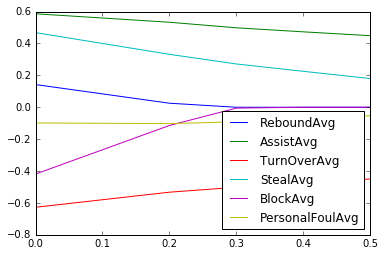

In [45]:
lasso_coeff = {}
for alpha in lasso_alphas:
    lasso = linear_model.Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coeff[alpha] = lasso.coef_
lpd = pd.DataFrame.from_dict(lasso_coeff, orient='index', )
lpd.columns = data.columns[8:]
lpd=lpd.sort_index()
lpd.plot()

In [46]:
ridge_alphas =  [0.00001, 0.0001,0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10, 100] 
ridge_avg_rmse = {}

for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    avg_mse = 0
    for k, (train, test) in enumerate(k_fold):
        ridge.fit(X_train[train], y_train[train])
        avg_mse = avg_mse + mean_squared_error(y_train[test], ridge.predict(X_train[test])) 
    ridge_avg_rmse[alpha] = avg_mse / n_folds
best_alpha_ridge = min(ridge_avg_rmse, key=ridge_avg_rmse.get)
print("Best ridge alpha: {}".format(best_alpha_ridge))

Best ridge alpha: 10


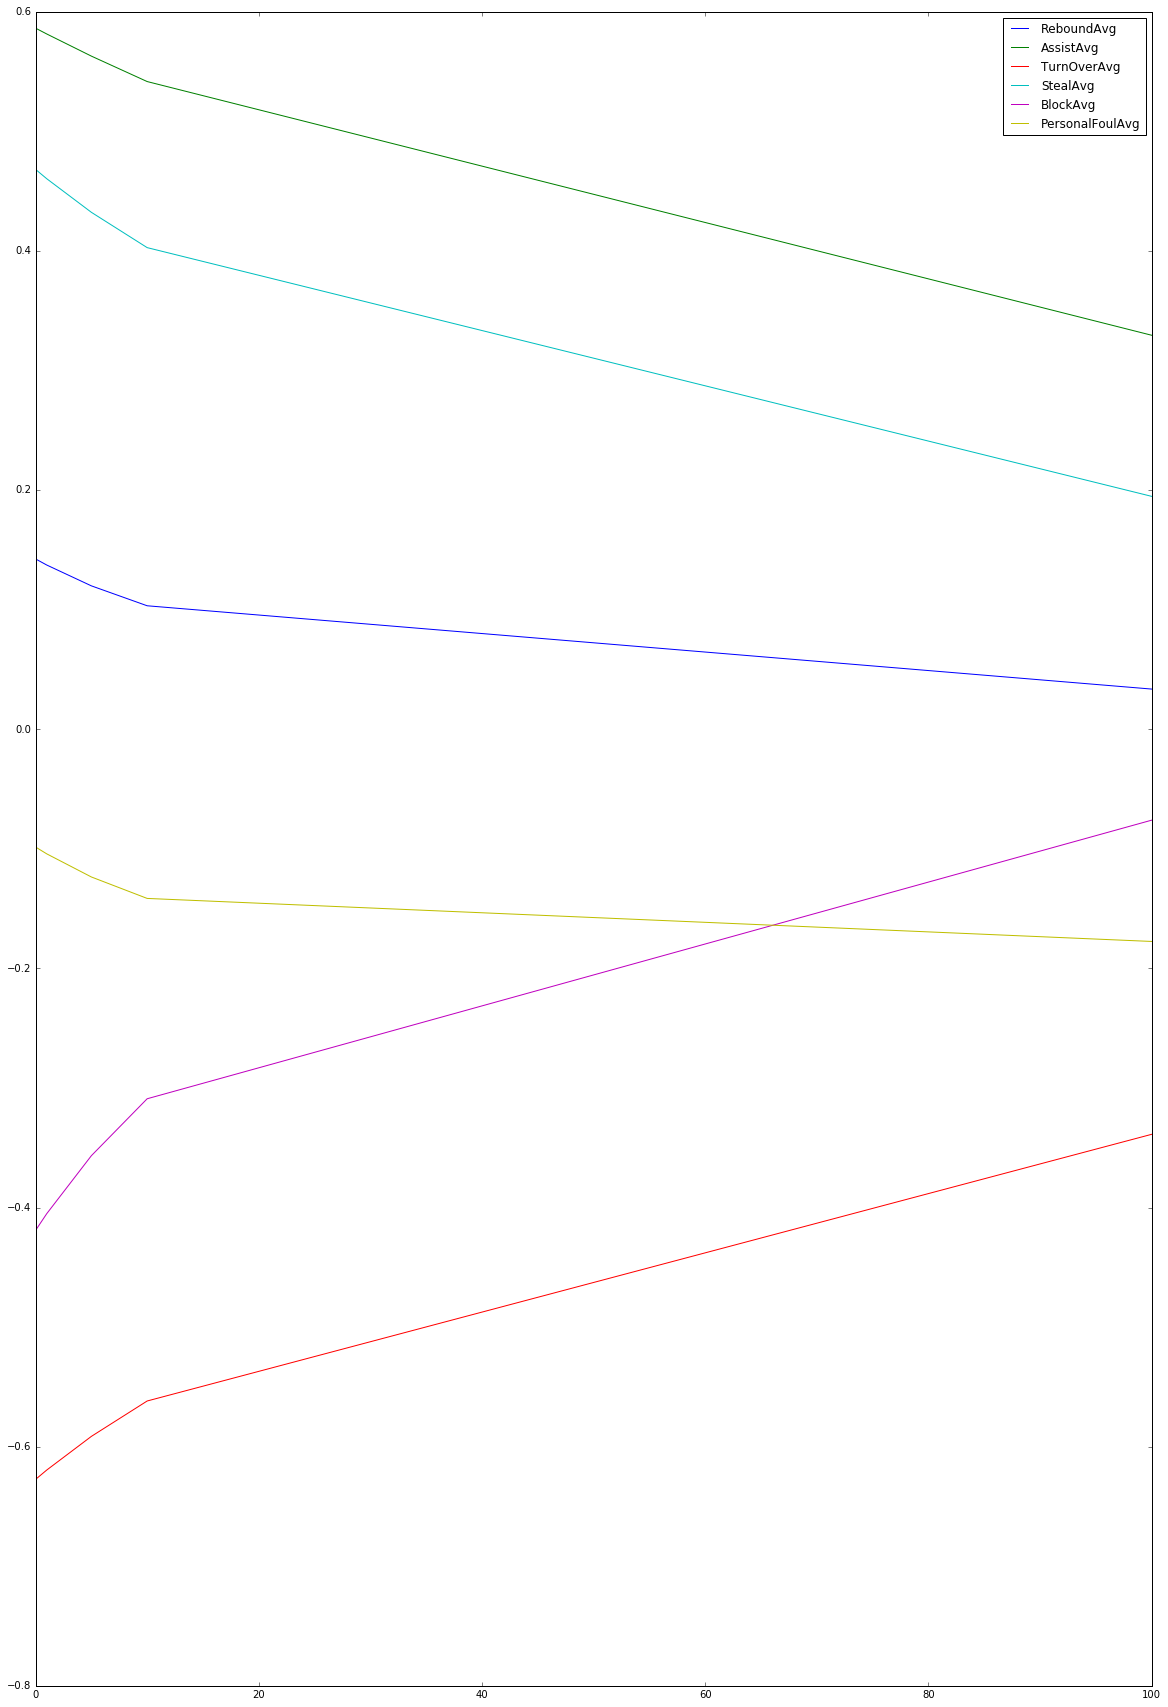

In [48]:
ridge_coeff = {}
for alpha in ridge_alphas:
    ridge = linear_model.Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coeff[alpha] = ridge.coef_
rpd = pd.DataFrame.from_dict(ridge_coeff, orient='index')
rpd.columns = data.columns[8:]
rpd = rpd.sort_index()
rpd.plot(figsize = (20,30))